<a href="https://colab.research.google.com/github/dohyeonYoon/Paper-review/blob/main/AlexNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from keras.utils import np_utils
import matplotlib.pyplot as plt
import os
import time

# Using cifar_dataset 

In [ ]:
(x_train, y_train), (x_test, y_test)  = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [ ]:
y_train.shape

(50000, 1)

In [ ]:
num_classes = 10
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [ ]:
y_train.shape

(50000, 10)

In [ ]:
validation_images, validation_labels = x_train[:500], y_train[:500]
train_images, train_labels = x_train[500:], y_train[500:]

In [ ]:
train_images.shape

(49500, 32, 32, 3)

# Model

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(3,3), strides=(1,1), activation='relu', input_shape=(32,32,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=( 3,3 ), strides=(2 , 2)),
    keras.layers.Conv2D(filters= 256  , kernel_size=( 5,5 ), strides=(1 ,1 ), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=( 3 ,3 ), strides=( 2, 2 )),
    keras.layers.Conv2D(filters=384 , kernel_size=(3 ,3 ), strides=( 1,1 ), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters= 384, kernel_size=(1 ,1 ), strides=( 1,1 ), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=  256 , kernel_size=(1 ,1 ), strides=( 1,1 ), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=( 3,3 ), strides=(2 ,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

https://stackoverrun.com/ko/q/11696058

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 96)        2688      
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 96)        384       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 256)       614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 256)       1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 256)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 384)         8

In [ ]:
# 중요!!! 데이터 augment는 모델에 귀속되지않고 데이터에 귀속되므로 모델에서 오구먼트 해줄 필요 없다 여기서 해주는게 더 좋다  

from keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Training

In [ ]:
train_datagen.fit(train_images)
validation_datagen.fit(validation_images)

https://www.geeksforgeeks.org/keras-fit-and-keras-fit_generator/

In [ ]:
history = model.fit_generator(train_datagen.flow(train_images,train_labels, batch_size = 32), 
                    validation_data = validation_datagen.flow(validation_images, validation_labels, batch_size = 32),
                    epochs = 10)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
1547/1547 [==============================] - 57s 17ms/step - loss: 2.1639 - accuracy: 0.3412 - val_loss: 1.7643 - val_accuracy: 0.4160
Epoch 2/10
1547/1547 [==============================] - 26s 17ms/step - loss: 1.2721 - accuracy: 0.5524 - val_loss: 1.0658 - val_accuracy: 0.6260
Epoch 3/10
1547/1547 [==============================] - 27s 17ms/step - loss: 1.0584 - accuracy: 0.6352 - val_loss: 1.1864 - val_accuracy: 0.6160
Epoch 4/10
1547/1547 [==============================] - 26s 17ms/step - loss: 0.9624 - accuracy: 0.6721 - val_loss: 1.0125 - val_accuracy: 0.6560
Epoch 5/10
1547/1547 [==============================] - 26s 17ms/step - loss: 0.8489 - accuracy: 0.7096 - val_loss: 0.8413 - val_accuracy: 0.7060
Epoch 6/10
1547/1547 [==============================] - 26s 17ms/step - loss: 0.7851 - accuracy: 0.7350 - val_loss: 0.7297 - val_accuracy: 0.7600
Epoch 7/10
1547/1547 [==============================] - 26s 17ms/step - loss: 0.7574 - accuracy: 0.7460 - val_loss: 1.1302 -

# Visualization

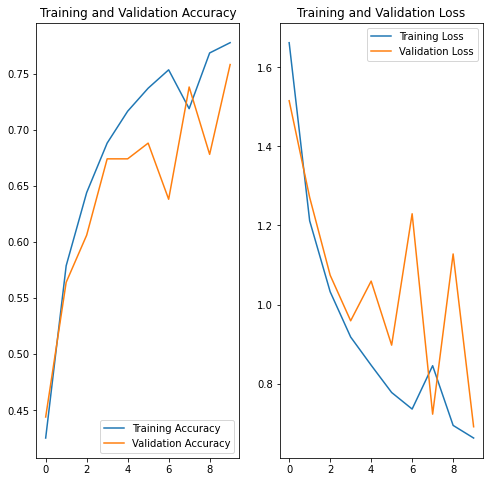

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()